In [1]:
import pandas as pd
from datetime import datetime, timedelta
import openpyxl
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

#Lendo as bases de dados
base_de_alunos = pd.read_csv('base de alunos6.csv', sep=';', encoding='latin-1')
base_de_dengue = pd.read_csv('base de dengue6.csv', sep=';', encoding='latin-1')
base_de_onibus = pd.read_csv('base de onibus6.csv', sep=';', encoding='latin-1')

In [2]:
# Função para converter datas abreviadas para formato padrão
def convert_date_abreviated(date):
    date_str = str(date)
    day = date_str[:2]
    month = date_str[2:4]
    year = date_str[4:]
    return f"{day}/{month}/{year}"

base_de_onibus["Data de Nascimento"] = base_de_onibus["Data de Nascimento"].apply(convert_date_abreviated)

In [3]:
# Ajustando a função de validação para considerar os diferentes formatos de datas
def is_valid_date_adjusted(date_str):
    # Removendo a hora, se presente
    date_str = date_str.split()[0]
    # Substituindo hífens por barras
    date_str = date_str.replace("-", "/")
    
    try:
        # Tentamos converter a string para uma data
        date_obj = datetime.strptime(date_str, '%d/%m/%Y')
        
        # Verifica se o ano está no intervalo permitido
        if 1923 <= date_obj.year <= 2023:
            return True
        return False
    except:
        # Se houver um erro na conversão, a data é inválida
        return False

In [4]:
# Filtrando as bases usando a função ajustada de validação
base_de_alunos = base_de_alunos[base_de_alunos['Data de Nascimento'].apply(is_valid_date_adjusted)]
base_de_dengue = base_de_dengue[base_de_dengue['Data de Nascimento'].apply(is_valid_date_adjusted) & 
                                base_de_dengue['Data da Dengue'].apply(is_valid_date_adjusted)]
base_de_onibus = base_de_onibus[base_de_onibus['Data de Nascimento'].apply(is_valid_date_adjusted)]
# Retornando o tamanho das bases após o novo tratamento
len(base_de_alunos), len(base_de_dengue), len(base_de_onibus)

(90, 42, 9)

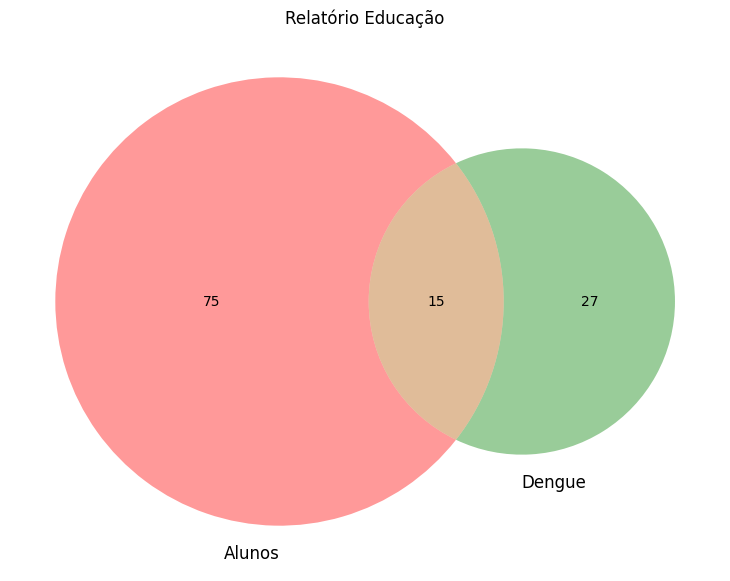

,Nome,Data de Nascimento,ID
0,AURI SILVA SOBRINHO,08/01/1996,0
1,FRANCISCO FREITAS SOUSA,20/09/2008,1
2,ANA VENANCIO CARLOS,11/01/2003,4
3,ANA AGUIAR SILVA,21/09/1999,6
5,ATOS SOUSA SILVA,01/02/1926,9


In [5]:
# Identificando os IDs dos cidadãos que tiveram dengue
ids_com_dengue = base_de_dengue['ID'].unique()

# Removendo os cidadãos que tiveram dengue da base de alunos
relatório_educacao = base_de_alunos[~base_de_alunos['ID'].isin(ids_com_dengue)]

# Selecionando apenas as colunas necessárias para o relatório
relatório_educacao = relatório_educacao[['Nome', 'Data de Nascimento', 'ID']]

# Exibindo as primeiras linhas do relatório para verificação

# Supondo que ids_alunos e ids_dengue são conjuntos contendo os IDs de alunos e pessoas com dengue
ids_alunos = set(base_de_alunos['ID'])
ids_dengue = set(base_de_dengue['ID'])

plt.figure(figsize=(10, 7))
venn = venn2([ids_alunos, ids_dengue], ('Alunos', 'Dengue'))

# Configurando as etiquetas para mostrar as contagens
venn.get_label_by_id('10').set_text(len(ids_alunos - ids_dengue))  # Alunos que NÃO tiveram dengue
venn.get_label_by_id('01').set_text(len(ids_dengue - ids_alunos))  # Pessoas com dengue que NÃO são alunos
venn.get_label_by_id('11').set_text(len(ids_alunos & ids_dengue))  # Alunos que tiveram dengue

plt.title("Relatório Educação")
plt.show()
relatório_educacao.head()# 94 entradas

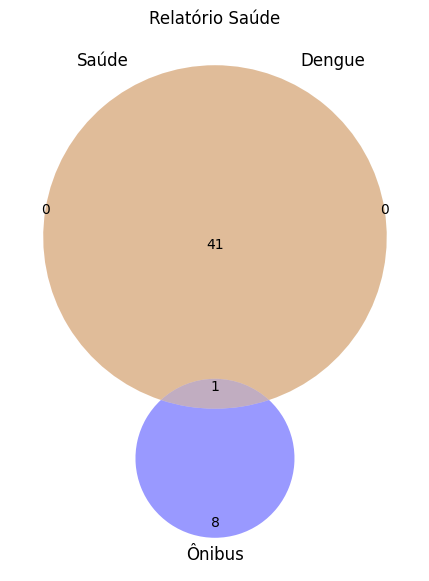

,Nome,Data de Nascimento,Data da Dengue
11,FRANCISCO,13/06/1976,28/10/2003


In [6]:
# Identificando os IDs dos cidadãos que utilizam ônibus
ids_usam_onibus = base_de_onibus['ID'].unique()

# Filtrando os cidadãos que frequentaram o posto de saúde e utilizam ônibus
relatório_saúde = base_de_dengue[base_de_dengue['ID'].isin(ids_usam_onibus)]

# Selecionando apenas as colunas necessárias para o relatório
relatório_saúde = relatório_saúde[['Nome', 'Data de Nascimento', 'Data da Dengue']]
# Suponha que ids_saude, ids_dengue e ids_onibus são conjuntos contendo os IDs das respectivas categorias
ids_saude = set(base_de_dengue['ID'])
ids_dengue = set(base_de_dengue['ID'])
ids_onibus = set(base_de_onibus['ID'])

plt.figure(figsize=(10, 7))
venn = venn3([ids_saude, ids_dengue, ids_onibus], ('Saúde', 'Dengue', 'Ônibus'))

# Configurando as etiquetas para mostrar as contagens
venn.get_label_by_id('100').set_text(len(ids_saude - (ids_dengue | ids_onibus))) # Apenas Saúde
venn.get_label_by_id('010').set_text(len(ids_dengue - (ids_saude | ids_onibus))) # Apenas Dengue
venn.get_label_by_id('001').set_text(len(ids_onibus - (ids_saude | ids_dengue))) # Apenas Ônibus

# Verificar se a interseção não está vazia antes de definir o texto
intersection_101 = ids_saude & ids_onibus - ids_dengue
if intersection_101:
    venn.get_label_by_id('101').set_text(len(intersection_101)) # Saúde e Ônibus, mas não Dengue

intersection_011 = ids_dengue & ids_onibus - ids_saude
if intersection_011:
    venn.get_label_by_id('011').set_text(len(intersection_011)) # Dengue e Ônibus, mas não Saúde

venn.get_label_by_id('110').set_text(len(ids_saude & ids_dengue - ids_onibus)) # Saúde e Dengue, mas não Ônibus
venn.get_label_by_id('111').set_text(len(ids_saude & ids_dengue & ids_onibus)) # Todos os três

plt.title("Relatório Saúde")
plt.show()
relatório_saúde.head()#1



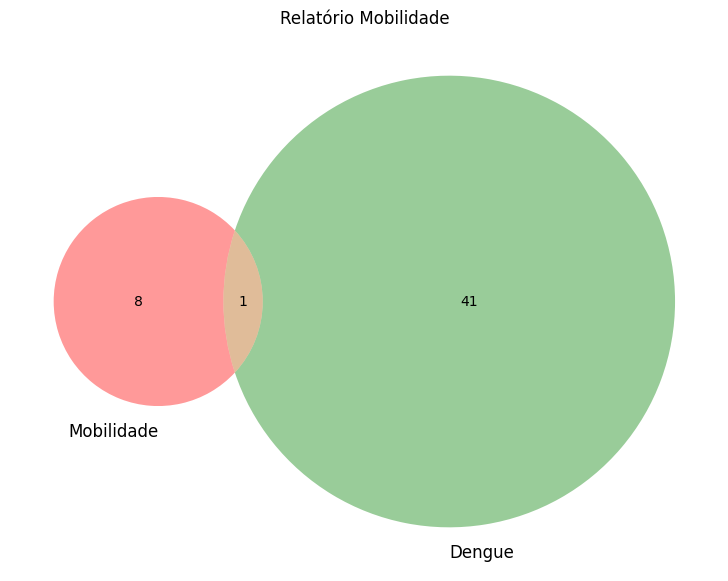

,Nome,Data de Nascimento,Ônibus
16,JOSEFA SILVA ROCHA,14/11/1950,794
49,CAILON DIAS PEREIRA,23/11/1982,"205, 650, 061, 038, 676, 197, 214"
56,FRANCISCA SULVA CAVALQPNTE,14/11/1975,"559, 378, 412, 501, 028"
207,LENE SANTOS FERREIRA,11/10/1986,205
237,MJTHEUS,29/12/1948,"905, 367, 433, 875, 855"


In [7]:
# Removendo os cidadãos que tiveram dengue da base de ônibus
relatório_mobilidade = base_de_onibus[~base_de_onibus['ID'].isin(ids_com_dengue)]

# Selecionando apenas as colunas necessárias para o relatório
relatório_mobilidade = relatório_mobilidade[['Nome', 'Data de Nascimento', 'Ônibus']]


# Suponha que ids_mobilidade e ids_dengue são conjuntos contendo os IDs das respectivas categorias
ids_mobilidade = set(base_de_onibus['ID'])
ids_dengue = set(base_de_dengue['ID'])

plt.figure(figsize=(10, 7))
venn = venn2([ids_mobilidade, ids_dengue], ('Mobilidade', 'Dengue'))

# Configurando as etiquetas para mostrar as contagens
venn.get_label_by_id('10').set_text(len(ids_mobilidade - ids_dengue))  # Mobilidade sem Dengue
venn.get_label_by_id('01').set_text(len(ids_dengue - ids_mobilidade))  # Dengue sem Mobilidade
venn.get_label_by_id('11').set_text(len(ids_mobilidade & ids_dengue))  # Mobilidade com Dengue

plt.title("Relatório Mobilidade")
plt.show()

# Exibindo as primeiras linhas do relatório para verificação
relatório_mobilidade.head() # 1 entradas

In [8]:
from matplotlib_venn import venn2

# Filtrando os cidadãos que frequentaram a escola e tiveram dengue
relatório_educacao_saude = pd.merge(base_de_alunos, base_de_dengue, on=['ID', 'Nome', 'Data de Nascimento'], how='inner')

# Selecionando apenas as colunas necessárias para o relatório
relatório_educacao_saude = relatório_educacao_saude[['Nome', 'Data de Nascimento', 'ID', 'Data da Dengue']]

# Exibindo as primeiras linhas do relatório para verificação
relatório_educacao_saude.head() # 0 entradas



,Nome,Data de Nascimento,ID,Data da Dengue


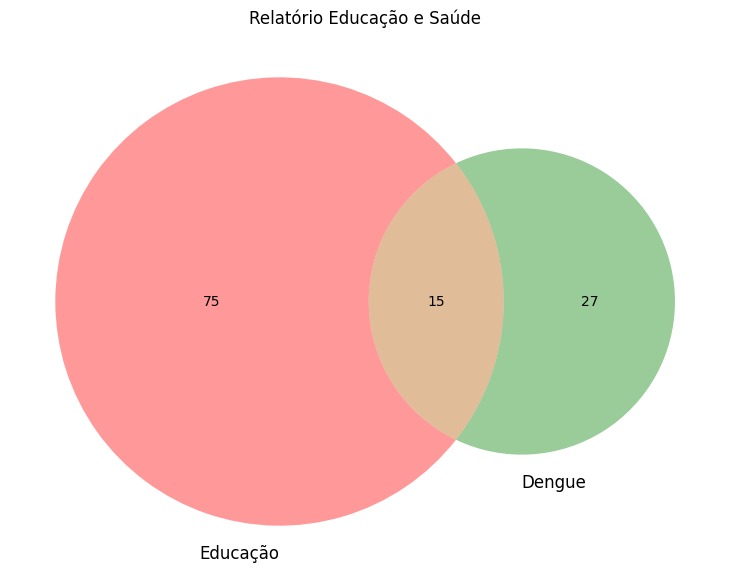

,Nome,Data de Nascimento,ID,Ônibus
0,MARIA S F,21/05/1995,16,794
1,RENON S F,22/10/2007,77,"837, 590, 608, 859, 123, 149, 739, 210, 407, 529"


In [9]:
# Gerando o relatório "Educação e Mobilidade" para os 2 registros identificados
relatório_educacao_mobilidade = pd.merge(base_de_alunos, base_de_onibus, on=['ID', 'Nome', 'Data de Nascimento'], how='inner')

# Selecionando apenas as colunas necessárias para o relatório
relatório_educacao_mobilidade = relatório_educacao_mobilidade[['Nome', 'Data de Nascimento', 'ID', 'Ônibus']]

# Gerando o relatório "Educação e Mobilidade" usando apenas o ID para a junção
relatório_educacao_mobilidade = pd.merge(base_de_alunos, base_de_onibus[['ID', 'Ônibus']], on='ID', how='inner')

# Selecionando as colunas necessárias para o relatório
relatório_educacao_mobilidade = relatório_educacao_mobilidade[['Nome', 'Data de Nascimento', 'ID', 'Ônibus']]
# Supondo que ids_educacao e ids_dengue são conjuntos contendo os IDs de cidadãos que frequentaram a escola e tiveram dengue
ids_educacao = set(base_de_alunos['ID'])
ids_dengue = set(base_de_dengue['ID'])

plt.figure(figsize=(10, 7))
venn = venn2([ids_educacao, ids_dengue], ('Educação', 'Dengue'))

# Configurando as etiquetas para mostrar as contagens
venn.get_label_by_id('10').set_text(len(ids_educacao - ids_dengue))  # Educação, mas não Dengue
venn.get_label_by_id('01').set_text(len(ids_dengue - ids_educacao))  # Dengue, mas não Educação
venn.get_label_by_id('11').set_text(len(ids_educacao & ids_dengue))  # Educação e Dengue

plt.title("Relatório Educação e Saúde")
plt.show()

relatório_educacao_mobilidade.head() # 15 entradas

In [10]:
# Combinando as três bases de dados para gerar o relatório "Saúde, Mobilidade e Educação"
relatório_combinado = pd.merge(base_de_dengue, base_de_onibus[['ID', 'Ônibus']], on='ID', how='inner')
relatório_combinado = pd.merge(relatório_combinado, base_de_alunos[['ID']], on='ID', how='inner')

# Selecionando as colunas necessárias para o relatório
relatório_saúde_mobilidade_educacao = relatório_combinado[['Nome', 'Data de Nascimento', 'Data da Dengue', 'Ônibus']]

relatório_saúde_mobilidade_educacao.head() # 0 entradas

,Nome,Data de Nascimento,Data da Dengue,Ônibus
0,FRANCISCO,13/06/1976,28/10/2003,"837, 590, 608, 859, 123, 149, 739, 210, 407, 529"


In [11]:
# Filtrando os cidadãos que frequentaram o posto de saúde e não utilizaram transporte público
relatório_saúde_sem_mobilidade = base_de_dengue[~base_de_dengue['ID'].isin(ids_usam_onibus)]

# Selecionando as colunas necessárias para o relatório
relatório_saúde_sem_mobilidade = relatório_saúde_sem_mobilidade[['Nome', 'Data de Nascimento', 'Data da Dengue']]

relatório_saúde_sem_mobilidade.head() # 43 entradas

,Nome,Data de Nascimento,Data da Dengue
1,CRISTIANE OLIVEIRA ALDEMIR,08/07/1976,10/09/2006
2,SARA OLIVEIRA COSTA,22/05/1967,02/11/1977
4,FRANCISCO SILVA SERGIO,13/09/1995,14/03/2002
5,MARIA,26/02/1955,02/02/2006
6,GILVANEIDE AMORIM GOMES,20/07/2002,17/04/2004


In [12]:
# Definindo a variável ids_alunos com os IDs dos cidadãos que frequentaram a escola
ids_alunos = set(base_de_alunos['ID'])

# Filtrando os cidadãos que frequentaram o posto de saúde e não frequentaram a escola
relatório_saúde_sem_educacao = base_de_dengue[~base_de_dengue['ID'].isin(ids_alunos)]

# Selecionando as colunas necessárias para o relatório
relatório_saúde_sem_educacao = relatório_saúde_sem_educacao[['Nome', 'Data de Nascimento', 'Data da Dengue']]

relatório_saúde_sem_educacao.head() # 23 entradas

,Nome,Data de Nascimento,Data da Dengue
4,FRANCISCO SILVA SERGIO,13/09/1995,14/03/2002
5,MARIA,26/02/1955,02/02/2006
6,GILVANEIDE AMORIM GOMES,20/07/2002,17/04/2004
7,FERNANDO ODETV ROBERTO,11/04/1959,11/07/2001
8,JOAO FERREIRT BRANDAO,12/01/1964,08/03/1994


In [13]:
# Filtrando os cidadãos que frequentaram o posto de saúde, não frequentaram a escola e não utilizaram transporte público
relatório_saúde_sem_educacao_mobilidade = base_de_dengue[~base_de_dengue['ID'].isin(ids_alunos) & 
                                                        ~base_de_dengue['ID'].isin(ids_usam_onibus)]

# Selecionando as colunas necessárias para o relatório
relatório_saúde_sem_educacao_mobilidade = relatório_saúde_sem_educacao_mobilidade[['Nome', 'Data de Nascimento', 'Data da Dengue']]

relatório_saúde_sem_educacao_mobilidade # 23 entradas




,Nome,Data de Nascimento,Data da Dengue
4,FRANCISCO SILVA SERGIO,13/09/1995,14/03/2002
5,MARIA,26/02/1955,02/02/2006
6,GILVANEIDE AMORIM GOMES,20/07/2002,17/04/2004
7,FERNANDO ODETV ROBERTO,11/04/1959,11/07/2001
8,JOAO FERREIRT BRANDAO,12/01/1964,08/03/1994
12,JOAO O A,18/07/1955,11/11/1973
14,ALEX,07/02/1972,12/05/2005
15,MARIAMARIK PEREXRA,20/11/1990,05/11/2018
18,MARCDS BERNARDO ROCHA,30/05/1959,04/07/1962
19,ANA MELO TIBURCIO,08/06/1994,12/09/2019
